## Matplotlib教程
参考[https://matplotlib.org/3.1.1/tutorials/introductory/usage.html]

### 作图工具包的目的是什么？
帮助我们尽量简单地将数据可视化，并包含对生成的图像所有可能的控制。也就是，大多数时候，利用相对高级的语言来实现这个功能，但在必要的时候，具备使用低级语言的能力。（入美思想的延伸：读英文原著，读程序的官方文档）

### matplotlib中的层次
Matplotlib中的一切都是按照层次来组织的。最上层是状态机环境，它由matplotlib.pyplot模块提供。在此层次，简单函数用以增加图像之元素，如线，图，文字等到当前图，当前Axes上。
下一层是：O-O接口。此层中，只对少量的几个函数使用pyplot,如创建图像，通过这些图像，一个或多个Axes对象可以被创建.这些Axes被用于大多数作图动作.

为了更多地控制，（对于将mpl.plot嵌入GUI应用往往非常重要），pyplot层次或许将被完全丢弃，只剩下纯的OO方法。

二维图像中，Axes对象有2个Axis对象(3维图像中给，Axes对象有3个Axis对象)。Axis关注数据值极限值(上下界).
Axes的方法有set_xlim(),ste_ylim()用以控制数据的界限。 处理Axis对象，需要用Locator和Formatter的正确组合.
此二者可以很好地控制tick（刚译:标识结）的位置及其标签(名).

每个Axes对象都有一个标题，set_title().有一个x轴标签， set_xlabel(),y轴标签, set_ylabel().
Axes对象及其基本函数是O-O接口之入门点.

所有可见东西都是Artists, 即figure, Axes, Axis,text都是.当图片被渲染(redered),所有的Artists都被画于画布(canvas),大多数Artist与Axes绑定。这样的Artists不能被多个Axes共享，也不能由一个Axes移动到另一个Axes.所有作图函数都期待np.array或者np.masked_array为其输入。所以，其他数据对象最好转成以上两类型再输入。转换方法：对于pandas.DataFrame, a.values; 而对于matrix,利用 np.asarray().


Matplotlib和pyplot,Pylab之间的关系是什么？
Matplobtlib是整个作图软件包的名字，pyplot是Matplobtlib中的一个模块(module). Pylab是一个已过时的模块，不建议用。

对于Pyplot模块中的函数，总是有一个当前图(figure)或当前Axes（自动创建的）如一般第一次调用plt.plot()时创建该Axes,接下来的调用则增加额外的线于同一个Axes上。

D:\Programs\Anaconda\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Matplotlib is currently using ps, which is a non-GUI backend, so cannot show the figure.


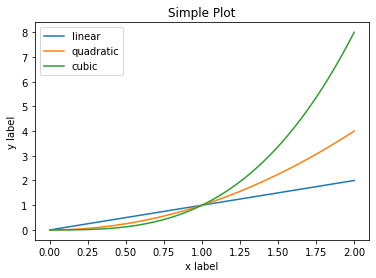

In [36]:
# 举一个简单例子，让我们来看清每一步到底做了什么。看一看命令背后发生了什么.
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 2, 100)

plt.plot(x, x, label='linear') # 创建了一个Axes对象
plt.plot(x, x**2, label='quadratic') # 在该Axes对象上画一条线，并为之起名（为其label属性赋值）
plt.plot(x, x**3, label='cubic')  # 在该Axes对象上画另一条线，并为之起名（为其label属性赋值）

plt.xlabel('x label') # 设置该Axes的xlabel
plt.ylabel('y label') # 设置该Axes的ylabel
 
plt.title("Simple Plot") # 为该Axes加标题

plt.legend()  #为该Axes加图例
plt.show()
#至此，只有一个Axel对象

### 编码样式

不同的样式各有优缺点。唯一的警告(Caveat)：要避免混用编码样式于你的代码中。
于各种不同的编码样式中，有两种得到了官方支持。故，使用matplotlib时,请优先考虑这两种样式。
对于pyplot样式，常见的导入命令是这样写的：

In [37]:
import matplotlib.pyplot as plt
import numpy as np

接下来，可以调用np.arange, np.zeros, np.pi, plt.figure, plt.plot,plt.show等函数。
利用pyplot接口创建图像，然后用对象方法做剩下的工作吧。

D:\Programs\Anaconda\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using ps, which is a non-GUI backend, so cannot show the figure.
  """


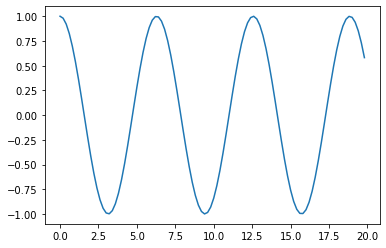

In [38]:
x = np.arange(0, 20, 0.2) 
y = np.cos(x)
fig, ax = plt.subplots() # 创建了两个对象：fig, ax
ax.plot(x, y)  # 在 ax上画曲线
plt.show()

那么，为何需要额外的这些输入(typing)工作? 为什么不用类似于MATLAB一样的类型呢？ (which relies on global state and a flat namespace)? 对于像此例一样的简单例子，唯一的优势就是其学术意义： 更多的样式会显得更清楚明白（more explicit, more clear） as to where things come from and what is going on.对于更复杂的应用, this explicitness and clarity becomes increasingly valuable, and the richer and more complete object-oriented interface will likely make the program easier to write and maintain.

Typically one finds oneself making the same plots over and over again, but with different data sets, which leads to needing to write specialized functions to do the plotting. The recommended function signature is something like:

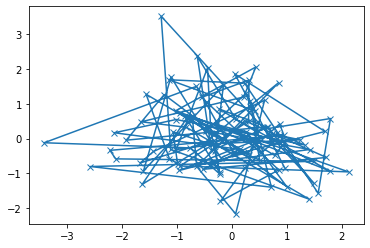

In [39]:
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph

    Parameters
    ----------
    ax : Axes
        The axes to draw to

    data1 : array
       The x data

    data2 : array
       The y data

    param_dict : dict
       Dictionary of kwargs to pass to ax.plot

    Returns
    -------
    out : list
        list of artists added
    """
    out = ax.plot(data1, data2, **param_dict)
    return out

# which you would then use as:

data1, data2, data3, data4 = np.random.randn(4, 100)
fig, ax = plt.subplots(1, 1)
my_plotter(ax, data1, data2, {'marker': 'x'})

如果你想要两个子图，可以这样写：

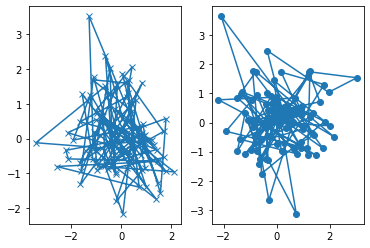

In [40]:
fig, (ax1, ax2) = plt.subplots(1, 2)  # 建立两个Axes对象
my_plotter(ax1, data1, data2, {'marker': 'x'})
my_plotter(ax2, data3, data4, {'marker': 'o'})

一旦图像变得复杂，这些技巧是绝对需要的！

## Backends

什么Backends?

首先要知道，matplotlib面向各种不同的用户，需要不同格式的输出.

matplotlib的应用分为如下几类：
（1）交互式作图，需要的图片是显示在弹出式窗口中。
（2）Jupyter notebooks用户想要的是内置于行间的图像，以便用于快速数据分析. (Jupyter notebook写书)
（3）嵌入matplotlib于像wxpython或pygtk这样的GUI中，用来生成更丰富的应用.（人脸识别软件，程序APP）
（4）用matplotlib于脚本中，用来为数值模拟生成(postscript)补充图片.（学术论文）
（5）运行网络应用服务器以动态地提供(serve up)图片. (银行，视频网站等的数据分析)
为了支持所有的这些应用情形，matplotlib能面向不同的输出。这些能力中的每一个，就叫一个backend. "frontend" 就是用户面对的代码，即,the plotting code, 而 "backend"做所有场景背后的困难工作(behind-the-scenes)以作图. 

Backend分为两类：用户界面backends (用在pygtk, wxpython, tkinter, qt4, 或 macosx中; 也被称为"交互式backends")和 硬复制backends(以作PNG, SVG, PDF, PS格式的图片; 也称 "非交互式backends").

有四种方法配置你的backend. 如果它们相互冲突了，下面清单中最后提到的方法(method)将会被使用.例如，调用use()方法将会覆盖( override) 你在 matplotlibrc中的设置.

1. matplotlibrc文件中的backend参数
(see Customizing Matplotlib with style sheets and rcParams): 
    
    backend : WXAgg   # use wxpython with antigrain (agg) rendering
      

2. Setting the MPLBACKEND environment variable, either for your current shell or for a single script. 

On Unix:
    
    >export MPLBACKEND=module://my_backend
    >python simple_plot.py
    >MPLBACKEND="module://my_backend" python simple_plot.py
        
On Windows, only the former is possible:
  
    > set MPLBACKEND=module://my_backend
    > python simple_plot.py
    
设置环境变量将会覆盖任意一个maplotlibrx中的backend参数,即使在你当前的工作目录下有一个Matplotlibrc. 因此，全局地设置MPLBACKEND, 例如. 在你的.bashrc 或 .profile中设置MPLBACKEND, 是很不明智的做法，因为这样做可能导致反直觉的行为.

3.If your script depends on a specific backend you can use the use() function:
    
    import matplotlib
    matplotlib.use('PS')   # generate postscript output by default
    
如果要使用use()函数, 必须在导入matplotlib.pyplot前使用. 在导入pyplot()以后再使用use() 的话，use()将不会有任何效果. Using use() will require changes in your code if users want to use a different backend. 所以，除了必须使用时，应该尽量避免调用use().

With a typical installation of matplotlib, such as from a binary installer or a linux distribution package, a good default backend will already be set, allowing both interactive work and plotting from scripts, with output to the screen and/or to a file, so at least initially you will not need to use any of the methods given above.

If, however, you want to write graphical user interfaces,或者一个网络应用服务器(web application server), 或者对于Matplotlib作图过程需要一个更好理解，那么，请继续读下文. To make things a little more customizable for graphical user interfaces, matplotlib 从画布(canvas)(图画之所在)概念中分离出“渲染器”概念（renderer ）(真正的画图工具). The canonical renderer for user interfaces is Agg which uses the Anti-Grain Geometry C++ library to make a raster (pixel) image of the figure. All of the user interfaces except macosx can be used with agg rendering, e.g., WXAgg, GTK3Agg, QT4Agg, QT5Agg, TkAgg. 另外, some of the user interfaces 支持其他的渲染引擎(engines). 例如, 利用GTK+ 3,你也能选择Cairo rendering (backend GTK3Cairo).

For the rendering engines, 你也可以 distinguish between 矢量或 栅格(raster)渲染器. Vector graphics languages issue drawing commands like "draw a line from this point to this point" and hence are scale free, and raster backends generate a pixel representation of the line whose accuracy depends on a DPI setting.

关于matplotlib 渲染器之总结 (there is an eponymous backend for each; these are non-interactive backends, capable of writing to a file):

    Renderer	Filetypes	Description
    ---------------------------------------
    AGG	png	raster graphics -- high quality images using the Anti-Grain Geometry engine
    PS	ps eps	vector graphics -- Postscript output
    PDF	pdf	vector graphics -- Portable Document Format
    SVG	svg	vector graphics -- Scalable Vector Graphics
    Cairo	png ps pdf svg	raster graphics and vector graphics -- using the Cairo graphics library


下面是the user interfaces and renderer combinations supported; these are interactive backends, capable of displaying to the screen and of using appropriate renderers from the table above to write to a file:

    Backend	Description
    -----------------------
    Qt5Agg	Agg rendering in a Qt5 canvas (requires PyQt5). This backend can be activated in IPython with %matplotlib qt5.
    ipympl	Agg rendering embedded in a Jupyter widget. (requires ipympl). This backend can be enabled in a Jupyter notebook with %matplotlib ipympl.
    GTK3Agg	Agg rendering to a GTK 3.x canvas (requires PyGObject, and pycairo or cairocffi). This backend can be activated in IPython with %matplotlib gtk3.
    macosx	Agg rendering into a Cocoa canvas in OSX. This backend can be activated in IPython with %matplotlib osx.
    TkAgg	Agg rendering to a Tk canvas (requires TkInter). This backend can be activated in IPython with %matplotlib tk.
    nbAgg	Embed an interactive figure in a Jupyter classic notebook. This backend can be enabled in Jupyter notebooks via %matplotlib notebook.
    WebAgg	On show() will start a tornado server with an interactive figure.
    GTK3Cairo	Cairo rendering to a GTK 3.x canvas (requires PyGObject, and pycairo or cairocffi).
    Qt4Agg	Agg rendering to a Qt4 canvas (requires PyQt4 or pyside). This backend can be activated in IPython with %matplotlib qt4.
    WXAgg	Agg rendering to a wxWidgets canvas (requires wxPython 4). This backend can be activated in IPython with %matplotlib wx.

### ipympl
mpl:Matplotlib的简称.

The Jupyter widget ecosystem is moving too fast to support directly in Matplotlib. To install ipympl

    pip install ipympl
    jupyter nbextension enable --py --sys-prefix ipympl

or

    conda install ipympl -c conda-forge

### GTK and Cairo
GTK3 backends (包括GTK3Agg 和 GTK3Cairo)依赖Cairo (pycairo>=1.11.0 or cairocffi).

### 如何选择 PyQt4 或 PySide?
The QT_API environment variable can be set to either pyqt or pyside to use PyQt4 or PySide, respectively.

Since the default value for the bindings to be used is PyQt4, matplotlib 首先试着导入PyQt4. 如果导入失败，它会试着导入PySide.

## What is interactive mode?
交互式 backend之使用 permits--but does not by itself require or ensure--plotting to the screen. Whether and when plotting to the screen occurs, and whether a script or shell session continues after a plot is drawn on the screen, depends on the functions and methods that are called, and on a state variable that determines whether matplotlib is in "interactive mode". 默认的Boolean变量由matplotlibrc文件设置, and may be customized like any other configuration parameter (see Customizing Matplotlib with style sheets and rcParams). It may also be set via matplotlib.interactive(), and its value may be queried via matplotlib.is_interactive(). 将交互式模式打开和关闭in the middle of a stream of plotting commands, whether in a script or in a shell, is rarely needed and potentially confusing, so in the following we will assume all plotting is done with interactive mode either on or off.

交互模式也可由matplotlib.pyplot.ion()打开,由matplotlib.pyplot.ioff()关闭.

### 注意：
交互模式 works with suitable backends in ipython and in the ordinary python shell,但交互模式不能在IDLE IDE正常工作. If the default backend does not support interactivity, an interactive backend can be explicitly activated using any of the methods discussed in What is a backend?.

### Interactive example
对于非交互模式作图，建议用pyplot创建对象，然后用OO接口作图。
From an ordinary python prompt, or after invoking ipython with no options, try this:

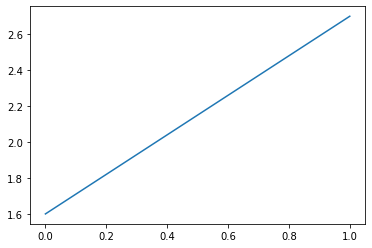

In [41]:
import matplotlib.pyplot as plt
plt.ion()  #打开交互模式
plt.plot([1.6, 2.7])

Assuming you are running version 1.0.1 or higher, and you have an interactive backend installed and selected by default, you should see a plot, and your terminal prompt should also be active; you can type additional commands such as:

Text(0.5, 0, 'index')

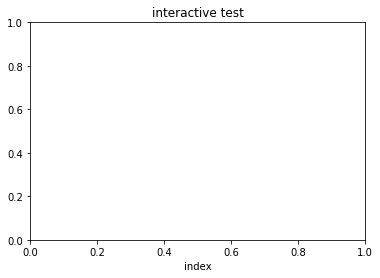

In [42]:
plt.title("interactive test")
plt.xlabel("index")

In [43]:
### (题外话)To know the version of matplotlib
print(matplotlib.__version__)

3.1.1


 你将会看到the plot being updated after each line. Since version 1.5, modifying the plot by other means should also automatically update the display on most backends. Get a reference to the Axes instance, and call a method of that instance:

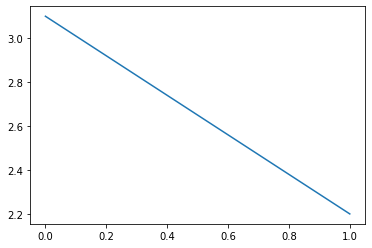

In [44]:
ax = plt.gca()
ax.plot([3.1, 2.2])

If you are using certain backends (like macosx), or an older version of matplotlib, you may not see the new line added to the plot immediately. In this case, you need to explicitly call draw() in order to update the plot:

In [45]:
plt.draw()

<Figure size 432x288 with 0 Axes>

## Non-interactive example
Start a fresh session as in the previous example, but now turn interactive mode off:

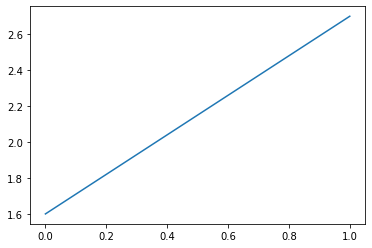

In [46]:
import matplotlib.pyplot as plt
plt.ioff()
plt.plot([1.6, 2.7])

Nothing happened--or at least nothing has shown up on the screen (unless you are using macosx backend, which is anomalous). To make the plot appear, you need to do this:

In [47]:
plt.show()

Now you see the plot, but your terminal command line is unresponsive; the show() command blocks the input of additional commands until you manually kill the plot window.

What good is this--being forced to use a blocking function? Suppose you need a script that plots the contents of a file to the screen. You want to look at that plot, and then end the script. Without some blocking command such as show(), the script would flash up the plot and then end immediately, leaving nothing on the screen.

In addition, non-interactive mode delays all drawing until show() is called; this is more efficient than redrawing the plot each time a line in the script adds a new feature.

### 总结
在交互模式, pyplot functions automatically draw to the screen.

When plotting interactively, if using object method calls in addition to pyplot functions, then call draw() whenever you want to refresh the plot.

Use non-interactive mode in scripts in which you want to generate one or more figures and display them before ending or generating a new set of figures. In that case, use show() to display the figure(s) and to block execution until you have manually destroyed them.


### 在Notebook上绘制图像
    
    %matplotlib inline




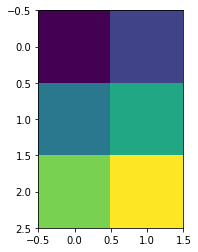

In [7]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

a = np.array([[1,2],[3,4],[5,6]])
plt.imshow(a, interpolation='nearest')

## 参考
 
    [1]https://matplotlib.org/3.1.1/tutorials/introductory/usage.html
    [2]Python神经网络编程，人民邮电出版社